## Import necessary libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
# Use pd.read_csv to import the cleaned_data csv from the Resources folder
data = pd.read_csv('Resources/cleaned_data.csv')
data.head(2)

,SongID,Performer,Song,duration_ms,explicit,danceability,energy,key,loudness,mode,...,time_signature,genre,duration_m,Month,Day,Year,Overall Peak,Total Weeks on Chart,Total Instances,Top 20
0,......And Roses And Rosesandy Williams,Andy Williams,......And Roses And Roses,166106.0,False,0.154,0.185,5.0,-14.063,1.0,...,4.0,adult standards,2.768433,5,8,1965,36,7,1,0
1,...And Then There Were Drumssandy Nelson,Sandy Nelson,...And Then There Were Drums,172066.0,False,0.588,0.672,11.0,-17.278,0.0,...,4.0,rock,2.867767,10,6,1962,65,4,1,0


#### Export a csv of just top 20 songs for use in tableau dashboard

In [3]:
# Select just the rows of the data set with a 1 in the 'Top 20' column - these are the songs in the top 20
top_20_songs = data[data['Top 20'] == 1].copy()

# Save to top_20_songs.csv in Resources folder - for use in tableau dashboard for visualizations
top_20_songs.to_csv('Resources/top_20_songs.csv')

## Check correlation between numeric variables and a song ending up in the top 20

In [4]:
# Drop all nonnumeric columns
correlation_check = data.drop(columns=['SongID', 'Performer', 'Song', 'Month', 'Day', 'Year', 'Overall Peak', 'genre', 'duration_ms'])

# Use .corr() to check the correlation between each numeric variable and a song ending up in the top 20
corr_matrix_20 = pd.DataFrame(correlation_check.corr()['Top 20']).reset_index().sort_values('Top 20')
corr_matrix_20

,index,Top 20
0,explicit,-0.059335
15,Total Instances,-0.047040
6,speechiness,-0.044262
4,loudness,-0.027748
8,instrumentalness,-0.026977
9,liveness,-0.021133
2,energy,-0.015859
11,tempo,-0.012138
5,mode,-0.009607
3,key,-0.008373


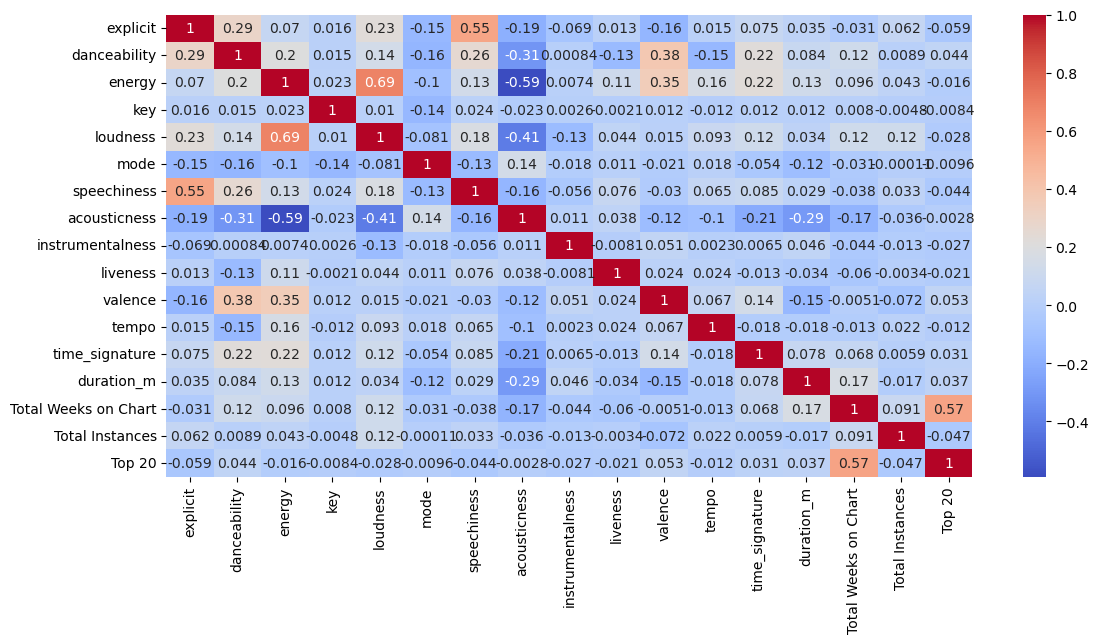

In [5]:
# Plot the correlation matrix to get a visual of the correlation
plt.figure(figsize=(13,6))
sns.heatmap(correlation_check.corr(), annot=True, cmap = 'coolwarm')
plt.show()

## Check trends of top 20 songs vs bottom 80 songs

#### Create two dataframes for easier analysis - one for top 20 songs, one for bottom 80

In [6]:
# Separate the original data into two dataframes to make analysis easier
top_songs = data[data['Overall Peak'] <= 20].reset_index(drop=True)
bottom_songs = data[data['Overall Peak'] > 20].reset_index(drop=True)

#### How many songs are in each category (top 20 vs. bottom 80)?

In [7]:
# Find and print the number of songs in each dataframe
print(f"Number of songs that made it into the top 20: {len(top_songs)} songs.")
print(f"Number of songs that didn't make it into the top 20: {len(bottom_songs)} songs.")

Number of songs that made it into the top 20: 6746 songs.
Number of songs that didn't make it into the top 20: 15880 songs.


#### Are there any genres more popular in top 20 vs. bottom 80?

In [8]:
# Use .value_counts() to calculate the number of songs in each genre for each dataframe
top_genres = pd.DataFrame(top_songs['genre'].value_counts()).reset_index()
bottom_genres = pd.DataFrame(bottom_songs['genre'].value_counts()).reset_index()

In [9]:
# Print the number of genres
print(f"Number of genres present in the top 20: {top_genres['genre'].nunique()} genres.")
print(f"Number of genres present in the bottom 80: {bottom_genres['genre'].nunique()} genres.")

Number of genres present in the top 20: 44 genres.
Number of genres present in the bottom 80: 52 genres.


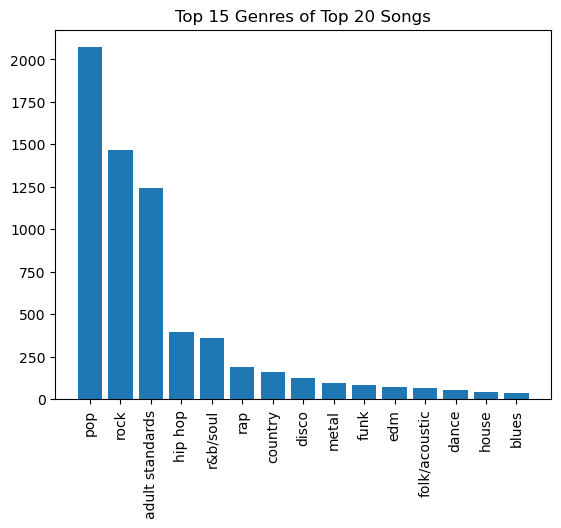

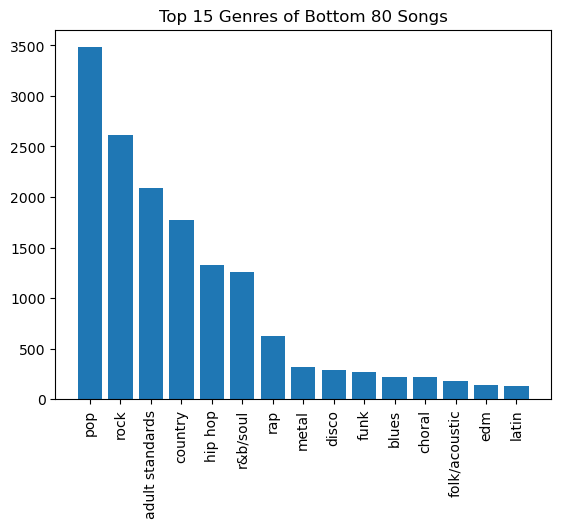

In [10]:
# Plot the top 15 genres for the top 20 and bottom 80 songs
plt.bar(top_genres['genre'].head(15), top_genres['count'].head(15))
plt.xticks(rotation=90)
plt.title('Top 15 Genres of Top 20 Songs')
plt.show()

plt.bar(bottom_genres['genre'].head(15), bottom_genres['count'].head(15))
plt.xticks(rotation=90)
plt.title('Top 15 Genres of Bottom 80 Songs')
plt.show()

#### Is there a difference in duration?

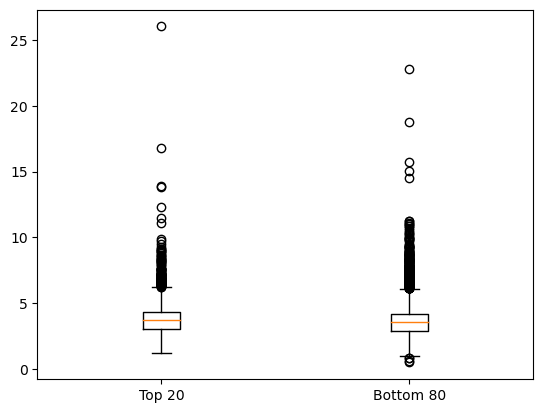

In [11]:
# Check the distribution of duration for both dataframes
fig, ax = plt.subplots()
plt.boxplot([top_songs['duration_m'], bottom_songs['duration_m']])
ax.set_xticklabels(['Top 20', 'Bottom 80'])
plt.show()

In [12]:
# Because both sets have quite a few outliers, we'll use median to look at the average duration of songs in each category
print(f" The average duration of a top 20 songs is about {round(top_songs['duration_m'].median(), 2)} minutes.")
print(f" The average duration of a bottom 80 songs is about {round(bottom_songs['duration_m'].median(), 2)} minutes.")

 The average duration of a top 20 songs is about 3.69 minutes.
 The average duration of a bottom 80 songs is about 3.56 minutes.


In [13]:
# Find the longest song in the top 20
top_songs[top_songs['duration_m'] == top_songs['duration_m'].max()]

,SongID,Performer,Song,duration_ms,explicit,danceability,energy,key,loudness,mode,...,time_signature,genre,duration_m,Month,Day,Year,Overall Peak,Total Weeks on Chart,Total Instances,Top 20
6008,Tubular Bellsmike Oldfield,Mike Oldfield,Tubular Bells,1561133.0,False,0.374,0.219,4.0,-19.104,0.0,...,4.0,rock,26.018883,5,11,1974,7,16,1,1


In [14]:
# Find the longest song in the bottom 80
bottom_songs[bottom_songs['duration_m'] == bottom_songs['duration_m'].max()]

,SongID,Performer,Song,duration_ms,explicit,danceability,energy,key,loudness,mode,...,time_signature,genre,duration_m,Month,Day,Year,Overall Peak,Total Weeks on Chart,Total Instances,Top 20
954,Autobahnkraftwerk,Kraftwerk,Autobahn,1367093.0,False,0.333,0.497,2.0,-15.606,1.0,...,4.0,rock,22.784883,5,3,1975,25,10,1,0


#### Any trends in explicitness?

In [15]:
# Calculate the percentage of songs that are explicit in the top 20 by using .value_counts() on the 'explicit' column
top_explicitness = pd.DataFrame(top_songs['explicit'].value_counts()).reset_index()
top_explicitness['pct_total'] = (top_explicitness['count']/top_explicitness['count'].sum())*100
print(f"{round(top_explicitness['pct_total'][1], 2)}% of top 20 songs are explicit.")

# Calculate the percentage of songs that are explicit in the bottom 80 by using .value_counts() on the 'explicit' column
bottom_explicitness = pd.DataFrame(bottom_songs['explicit'].value_counts()).reset_index()
bottom_explicitness['pct_total'] = (bottom_explicitness['count']/bottom_explicitness['count'].sum())*100
print(f"{round(bottom_explicitness['pct_total'][1], 2)}% of bottom 80 songs are explicit.")

9.41% of top 20 songs are explicit.
13.69% of bottom 80 songs are explicit.


#### Trends in danceability?

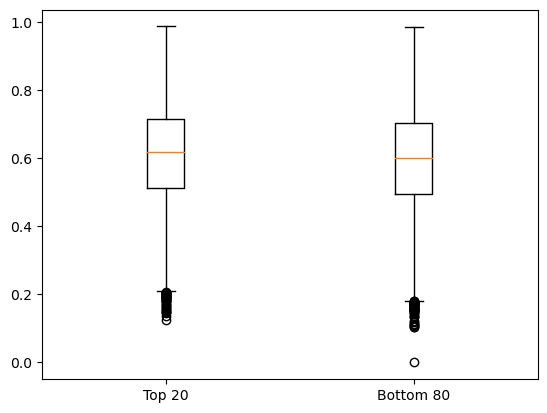

In [16]:
# Check the distribution of danceability for both dataframes
fig, ax = plt.subplots()
plt.boxplot([top_songs['danceability'], bottom_songs['danceability']])
ax.set_xticklabels(['Top 20', 'Bottom 80'])
plt.show()

In [17]:
# Because both sets have outliers, we'll use median to look at the average danceability of songs in each category
print(f" The average danceability of a top 20 songs is about {round(top_songs['danceability'].median()*100, 2)}%.")
print(f" The average danceability of a bottom 80 songs is about {round(bottom_songs['danceability'].median()*100, 2)}%.")

 The average danceability of a top 20 songs is about 62.0%.
 The average danceability of a bottom 80 songs is about 60.2%.


#### Trends in energy?

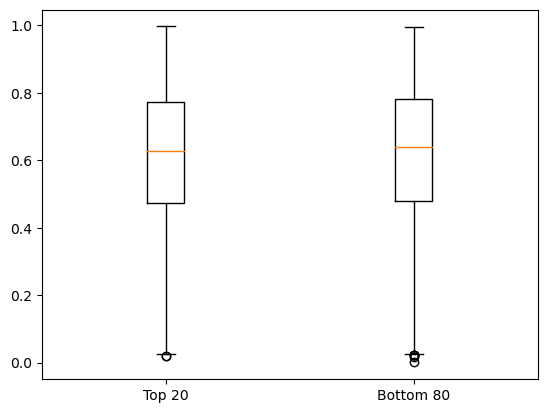

In [18]:
# Check the distribution of energy for both dataframes
fig, ax = plt.subplots()
plt.boxplot([top_songs['energy'], bottom_songs['energy']])
ax.set_xticklabels(['Top 20', 'Bottom 80'])
plt.show()

In [19]:
# Because both sets have outliers, we'll use median to look at the average energy of songs in each category
print(f" The average energy of a top 20 songs is about {round(top_songs['energy'].median()*100, 2)}%.")
print(f" The average energy of a bottom 80 songs is about {round(bottom_songs['energy'].median()*100, 2)}%.")

 The average energy of a top 20 songs is about 62.9%.
 The average energy of a bottom 80 songs is about 64.0%.


#### Trends in the key of a song?

In [20]:
# Calculate and print the average key for songs in the top 20 and bottom 80
print(f" The average key of a top 20 songs is about {round(top_songs['key'].mean(), 2)}.")
print(f" The average key of a bottom 80 songs is about {round(bottom_songs['key'].mean(), 2)}.")

 The average key of a top 20 songs is about 5.19.
 The average key of a bottom 80 songs is about 5.26.


#### Trends in loudness?

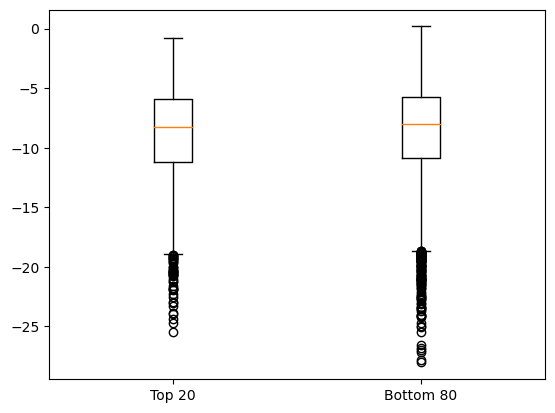

In [21]:
# Check the distribution of loudness for both dataframes
fig, ax = plt.subplots()
plt.boxplot([top_songs['loudness'], bottom_songs['loudness']])
ax.set_xticklabels(['Top 20', 'Bottom 80'])
plt.show()

In [22]:
# Because both sets have outliers, we'll use median to look at the average loudness of songs in each category
print(f" The average loudness of a top 20 songs is about {round(top_songs['loudness'].median(), 2)}.")
print(f" The average loudness of a bottom 80 songs is about {round(bottom_songs['loudness'].median(), 2)}.")

 The average loudness of a top 20 songs is about -8.3.
 The average loudness of a bottom 80 songs is about -8.03.


#### Trends in mode?

In [23]:
# Find the average mode for songs in both dataframes
print(f" The average mode of a top 20 songs is about {round(top_songs['mode'].mean(), 2)}.")
print(f" The average mode of a bottom 80 songs is about {round(bottom_songs['mode'].mean(), 2)}.")

 The average mode of a top 20 songs is about 0.72.
 The average mode of a bottom 80 songs is about 0.73.


#### Trends in speechiness?

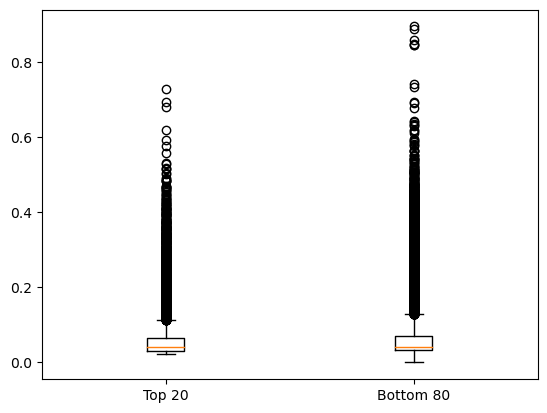

In [24]:
# Check the distribution of speechiness for both dataframes
fig, ax = plt.subplots()
plt.boxplot([top_songs['speechiness'], bottom_songs['speechiness']])
ax.set_xticklabels(['Top 20', 'Bottom 80'])
plt.show()

In [25]:
# Because both sets have outliers, we'll use median to look at the average speechiness of songs in each category
print(f" The average speechiness of a top 20 songs is about {round(top_songs['speechiness'].median(), 2)}.")
print(f" The average speechiness of a bottom 80 songs is about {round(bottom_songs['speechiness'].median(), 2)}.")

 The average speechiness of a top 20 songs is about 0.04.
 The average speechiness of a bottom 80 songs is about 0.04.


#### Trends in acousticness?

In [26]:
# Find the average acousticness for songs in the top 20 and bottom 80
print(f" The average acousticness of a top 20 songs is about {round(top_songs['acousticness'].mean()*100, 2)}%.")
print(f" The average acousticness of a bottom 80 songs is about {round(bottom_songs['acousticness'].mean()*100, 2)}%.")

 The average acousticness of a top 20 songs is about 28.87%.
 The average acousticness of a bottom 80 songs is about 29.04%.


#### Trends in instrumentalness?

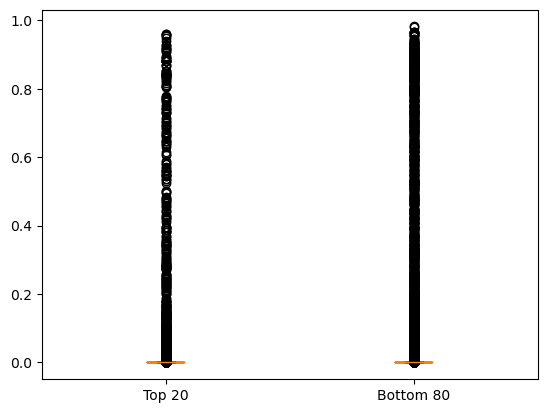

In [27]:
# Check the distribution of instrumentalness for both dataframes
fig, ax = plt.subplots()
plt.boxplot([top_songs['instrumentalness'], bottom_songs['instrumentalness']])
ax.set_xticklabels(['Top 20', 'Bottom 80'])
plt.show()

In [28]:
# Because both sets have outliers, we'll use median to look at the average instrumentalness of songs in each category
print(f" The average instrumentalness of a top 20 songs is about {round(top_songs['instrumentalness'].median()*100, 2)}%.")
print(f" The average instrumentalness of a bottom 80 songs is about {round(bottom_songs['instrumentalness'].median()*100, 2)}%.")

 The average instrumentalness of a top 20 songs is about 0.0%.
 The average instrumentalness of a bottom 80 songs is about 0.0%.


#### Trends in liveness?

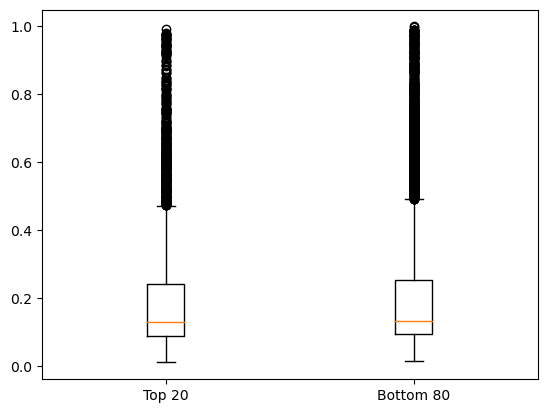

In [29]:
# Check the distribution of liveness for both dataframes
fig, ax = plt.subplots()
plt.boxplot([top_songs['liveness'], bottom_songs['liveness']])
ax.set_xticklabels(['Top 20', 'Bottom 80'])
plt.show()

In [30]:
# Because both sets have outliers, we'll use median to look at the average liveness of songs in each category
print(f" The average liveness of a top 20 songs is about {round(top_songs['liveness'].median()*100, 2)}%.")
print(f" The average liveness of a bottom 80 songs is about {round(bottom_songs['liveness'].median()*100, 2)}%.")

 The average liveness of a top 20 songs is about 12.8%.
 The average liveness of a bottom 80 songs is about 13.2%.


#### Trends in valence?

In [31]:
# Calculate and print the valence for songs in both dataframes
print(f" The average valence of a top 20 songs is about {round(top_songs['valence'].mean()*100, 2)}%.")
print(f" The average valence of a bottom 80 songs is about {round(bottom_songs['valence'].mean()*100, 2)}%.")

 The average valence of a top 20 songs is about 61.8%.
 The average valence of a bottom 80 songs is about 59.06%.


#### Trends in tempo?

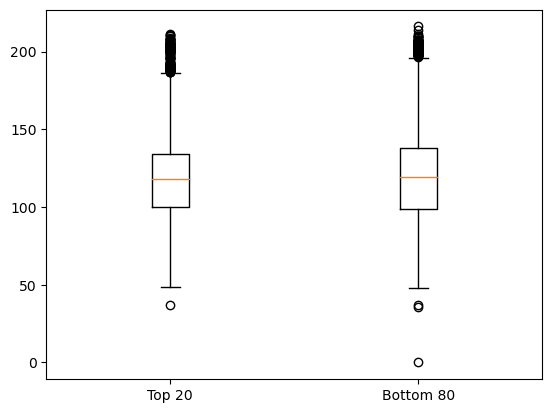

In [32]:
# Check the distribution of tempo for both dataframes
fig, ax = plt.subplots()
plt.boxplot([top_songs['tempo'], bottom_songs['tempo']])
ax.set_xticklabels(['Top 20', 'Bottom 80'])
plt.show()

In [33]:
# Because both sets have outliers, we'll use median to look at the average tempo of songs in each category
print(f" The average tempo of a top 20 songs is about {round(top_songs['tempo'].median(), 2)}.")
print(f" The average tempo of a bottom 80 songs is about {round(bottom_songs['tempo'].median(), 2)}.")

 The average tempo of a top 20 songs is about 118.35.
 The average tempo of a bottom 80 songs is about 119.07.


#### Trends in time signature?

In [34]:
# Calculate and print the average time signature for both dataframes
print(f" The average time_signature of a top 20 songs is about {round(top_songs['time_signature'].mean(), 2)}.")
print(f" The average time_signature of a bottom 80 songs is about {round(bottom_songs['time_signature'].mean(), 2)}.")

 The average time_signature of a top 20 songs is about 3.95.
 The average time_signature of a bottom 80 songs is about 3.93.


#### Trends in total weeks on the chart?

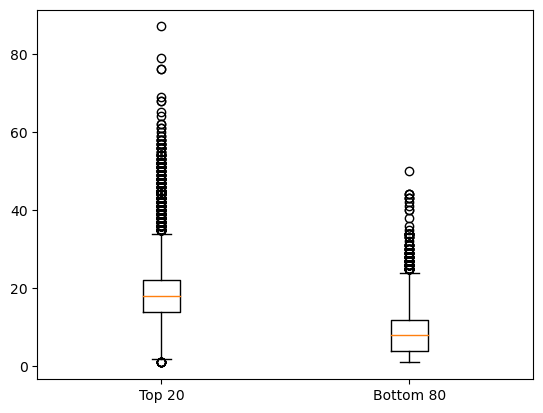

In [35]:
# Check the distribution of total weeks on the chart for both dataframes
fig, ax = plt.subplots()
plt.boxplot([top_songs['Total Weeks on Chart'], bottom_songs['Total Weeks on Chart']])
ax.set_xticklabels(['Top 20', 'Bottom 80'])
plt.show()

In [36]:
# Because both sets have outliers, we'll use median to look at the average total weeks on the chart in each category
print(f" The average number of total weeks on the charts for a top 20 songs is about {round(top_songs['Total Weeks on Chart'].median(), 2)}.")
print(f" The average number of total weeks on the charts for a bottom 80 songs is about {round(bottom_songs['Total Weeks on Chart'].median(), 2)}.")

 The average number of total weeks on the charts for a top 20 songs is about 18.0.
 The average number of total weeks on the charts for a bottom 80 songs is about 8.0.


In [37]:
# Use .value_counts() to find the distribution of songs for Total Weeks on Chart
top_weeks = pd.DataFrame(top_songs['Total Weeks on Chart'].value_counts()).reset_index()
bottom_weeks = pd.DataFrame(bottom_songs['Total Weeks on Chart'].value_counts()).reset_index()

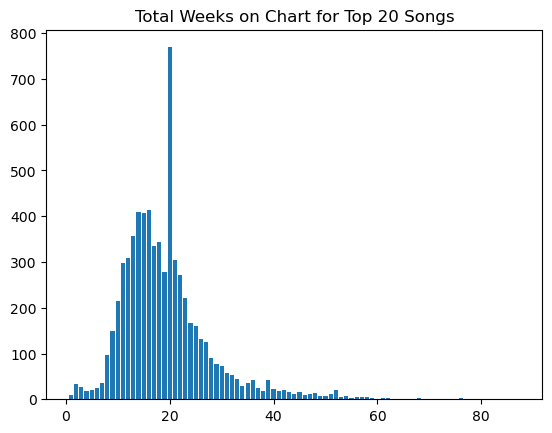

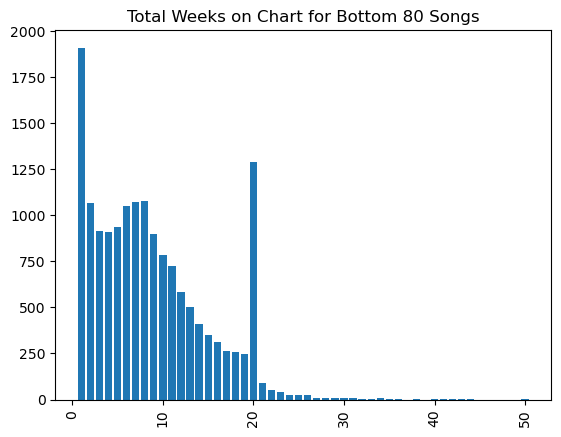

In [38]:
# Plot the distribution of Total Weeks on Chart for both top 20 songs and bottom 80
plt.bar(top_weeks['Total Weeks on Chart'], top_weeks['count'])
plt.title('Total Weeks on Chart for Top 20 Songs')
plt.show()

plt.bar(bottom_weeks['Total Weeks on Chart'], bottom_weeks['count'])
plt.xticks(rotation=90)
plt.title('Total Weeks on Chart for Bottom 80 Songs')
plt.show()

In [39]:
# Find the song on the charts for the shortest number of weeks for top 20 songs
top_songs[top_songs['Total Weeks on Chart'] == top_songs['Total Weeks on Chart'].min()]

,SongID,Performer,Song,duration_ms,explicit,danceability,energy,key,loudness,mode,...,time_signature,genre,duration_m,Month,Day,Year,Overall Peak,Total Weeks on Chart,Total Instances,Top 20
119,A Little Bit Longerjonas Brothers,Jonas Brothers,A Little Bit Longer,205013.0,False,0.304,0.612,0.0,-4.978,1.0,...,4.0,pop,3.416883,8,23,2008,11,1,1,1
278,Almost Like Prayinglin-Manuel Miranda Featurin...,Lin-Manuel Miranda,Almost Like Praying,200457.0,False,0.471,0.791,5.0,-3.373,0.0,...,4.0,soundtrack,3.340950,10,28,2017,20,1,1,1
642,Blue & Greybts,Bts,Blue & Grey,254950.0,False,0.547,0.605,8.0,-6.755,1.0,...,4.0,pop,4.249167,12,5,2020,13,1,1,1
1202,Dianaone Direction,One Direction,Diana,184666.0,False,0.549,0.868,2.0,-4.319,1.0,...,4.0,pop,3.077767,12,7,2013,11,1,1,1
1911,Gonekanye West Featuring Cam'Ron & Consequence,Kanye West,Gone,333293.0,True,0.851,0.682,10.0,-6.114,0.0,...,4.0,rap,5.554883,10,19,2013,18,1,1,1
1915,Good 4 Uolivia Rodrigo,Olivia Rodrigo,Good 4 U,178147.0,True,0.556,0.661,6.0,-5.052,0.0,...,4.0,pop,2.969117,5,29,2021,1,1,1,1
2004,Hairlady Gaga,Lady Gaga,Hair,202640.0,False,0.863,0.457,4.0,-6.422,0.0,...,4.0,pop,3.377333,6,4,2011,12,1,1,1
5148,State Of Gracetaylor Swift,Taylor Swift,State Of Grace,295186.0,False,0.584,0.834,4.0,-5.872,1.0,...,4.0,pop,4.919767,11,3,2012,13,1,1,1
5967,Toxicglee Cast,Glee Cast,Toxic,204413.0,False,0.607,0.740,8.0,-5.401,1.0,...,4.0,choral,3.406883,10,16,2010,16,1,1,1
6190,Wasted Lovematt Mcandrew,Matt Mcandrew,Wasted Love,213608.0,False,0.615,0.235,0.0,-11.210,1.0,...,3.0,pop,3.560133,1,3,2015,14,1,1,1


In [40]:
# Find the song in the top 20 that was on the chart for the greatest number of weeks
top_songs[top_songs['Total Weeks on Chart'] == top_songs['Total Weeks on Chart'].max()]

,SongID,Performer,Song,duration_ms,explicit,danceability,energy,key,loudness,mode,...,time_signature,genre,duration_m,Month,Day,Year,Overall Peak,Total Weeks on Chart,Total Instances,Top 20
4461,Radioactiveimagine Dragons,Imagine Dragons,Radioactive,186813.0,False,0.448,0.784,9.0,-3.686,1.0,...,4.0,rock,3.11355,7,6,2013,3,87,2,1


#### Trends in total instances?

In [41]:
# Because both sets are skewed, we'll use median to look at the average number of total instances in each category
print(f" The average number of total instances for a top 20 songs is about {round(top_songs['Total Instances'].median(), 2)}.")
print(f" The average number of total instances of a bottom 80 songs is about {round(bottom_songs['Total Instances'].median(), 2)}.")

 The average number of total instances for a top 20 songs is about 1.0.
 The average number of total instances of a bottom 80 songs is about 1.0.


In [42]:
# Use .value_counts() to find the dirtibution of songs by instances in the charts in each dataframe
top_instances = pd.DataFrame(top_songs['Total Instances'].value_counts()).reset_index()
bottom_instances = pd.DataFrame(bottom_songs['Total Instances'].value_counts()).reset_index()

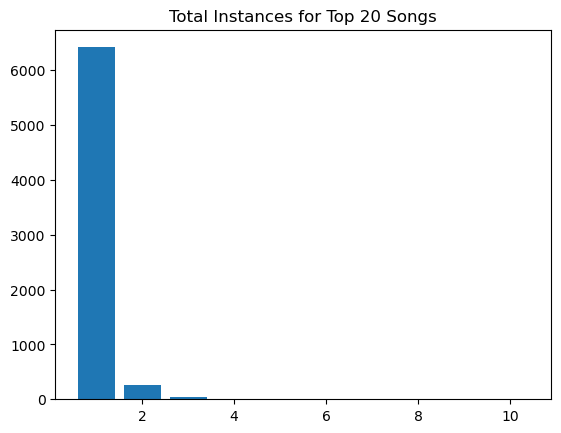

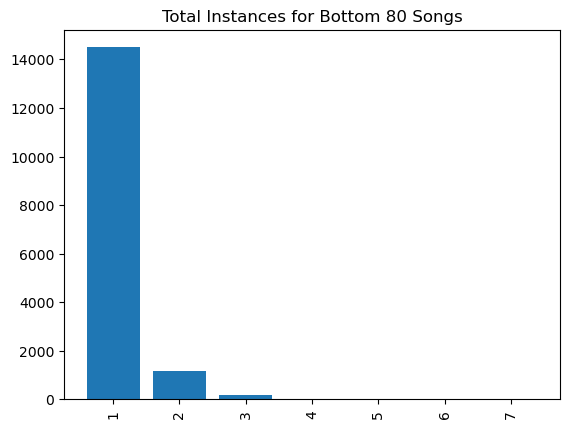

In [43]:
# Plot the instance ditribution for songs in the top 20
plt.bar(top_instances['Total Instances'], top_instances['count'])
plt.title('Total Instances for Top 20 Songs')
plt.show()

# Plot the instance distribution for songs in the bottom 80
plt.bar(bottom_instances['Total Instances'], bottom_instances['count'])
plt.xticks(rotation=90)
plt.title('Total Instances for Bottom 80 Songs')
plt.show()

In [44]:
# Find the song(s) with the greatest number of instances in the top 20
top_songs[top_songs['Total Instances'] == top_songs['Total Instances'].max()]

,SongID,Performer,Song,duration_ms,explicit,danceability,energy,key,loudness,mode,...,time_signature,genre,duration_m,Month,Day,Year,Overall Peak,Total Weeks on Chart,Total Instances,Top 20
239,All I Want For Christmas Is Youmariah Carey,Mariah Carey,All I Want For Christmas Is You,241106.0,False,0.335,0.625,7.0,-7.462,1.0,...,4.0,pop,4.018433,12,21,2019,1,43,10,1
4617,Rockin' Around The Christmas Treebrenda Lee,Brenda Lee,Rockin' Around The Christmas Tree,126266.0,False,0.589,0.472,8.0,-8.749,1.0,...,4.0,adult standards,2.104433,12,28,2019,2,39,10,1
